### Importing the libraries

In [45]:
# Importing the libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras import layers 
from sklearn.model_selection import train_test_split

### Importing the data
The data we used for this example are generated randomly with Numpy. In this data x and y are the point of coordinates and the color feature is the target value that was generated randomly which is in binary representing Red – 1 , Blue – 0.

In [46]:
# Importing the data 
df = pd.read_csv('./dataset/data.txt',sep=' ')

df

,x,y,color
0,-0.911245,-2.785512,1
1,-4.619232,-0.078916,1
2,-1.553978,-4.530748,1
3,-1.446546,2.342225,0
4,4.675002,-4.693160,0
...,...,...,...
19995,-2.043872,-3.015965,1
19996,-2.634502,2.853221,0
19997,-2.315085,4.922336,0
19998,1.191404,1.541128,1


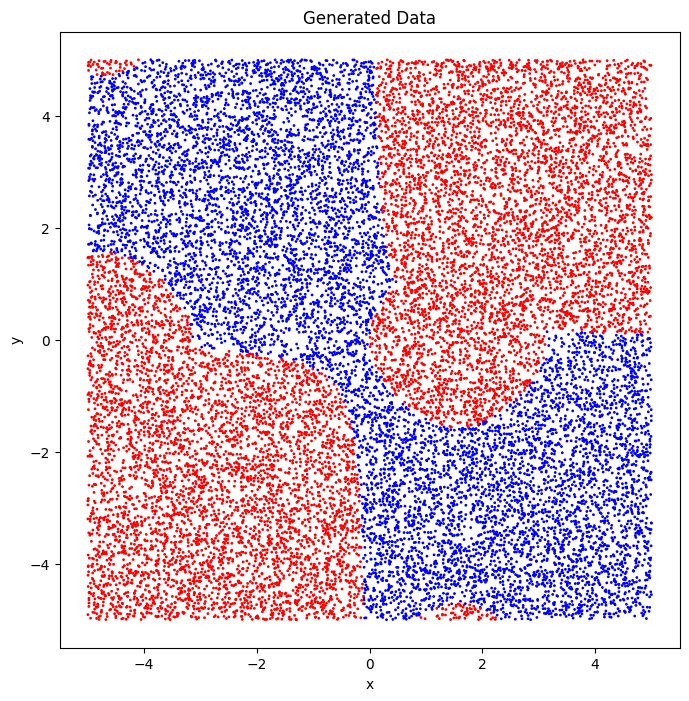

In [47]:
# Vẽ biểu đồ
plt.figure(figsize=(8, 8))
plt.scatter(x, y, c=color, cmap='bwr', s=1)
plt.title("Generated Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Splitting the data
Now we are going to split the dataset into train and test splits to evaluate the model with the unseen data and check its accuracy.

In [48]:
# split the data into train and test set 
train, test = train_test_split( 
    df, test_size=0.2, random_state=42, shuffle=True) 

### Constructing the input
In this step, we are going to construct the input we need to feed into a network. For simplicity and for the model’s sake we are going to stack the two features of the data into x and the target variable as y. We use numpy.column_stack() to stack the 

In [49]:
# Constructing the input 
x = np.column_stack((train.x.values, train.y.values))  
y = train.color.values

### Building a model
Now we are going to build a simple neural network to classify the color of the point with two input nodes and a hidden layer and an output layer with relu and sigmoid activation functions, and sparse categorical cross-entropy loss function and this is going to be a fully connected feed-forward network.

In [50]:
# Defining the model 
model = keras.Sequential([ 
    keras.layers.Dense(4, input_shape=(2,), activation='relu'), 
    keras.layers.Dense(2, activation='sigmoid') 
]) 
  
# Compiling the model 
model.compile(optimizer='adam', 
              loss=keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy']) 
  
# fitting the model 
model.fit(x, y, epochs=10, batch_size=8) 

Epoch 1/10


C:\Users\Phat PC\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 784us/step - accuracy: 0.6462 - loss: 0.5278
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 806us/step - accuracy: 0.7147 - loss: 0.4491
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.7177 - loss: 0.4386
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 901us/step - accuracy: 0.7266 - loss: 0.4319
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 839us/step - accuracy: 0.7327 - loss: 0.4315
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 842us/step - accuracy: 0.7249 - loss: 0.4320
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 849us/step - accuracy: 0.7305 - loss: 0.4250
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 858us/step - accuracy: 0.7346 - loss: 0.4276
Epoch 9/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.7241 - loss: 0.4328
Epoch 10/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 830us/step - accuracy: 0.7292 - loss: 0.4273


In [51]:
# Evaluating the model 
x = np.column_stack((test.x.values, test.y.values)) 
y = test.color.values 
model.evaluate(x, y, batch_size=8)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.7131 - loss: 0.4456


[0.4382203221321106, 0.7275000214576721]

### Building a better model
Now we are going to improve the model with a few extra hidden layers and a better activation function ‘softmax’ in the output layer and built a better neural network.

In [52]:
# Defining the model 
model_better = keras.Sequential([ 
    keras.layers.Dense(16, input_shape=(2,), activation='relu'), 
    keras.layers.Dense(32, activation='relu'), 
    keras.layers.Dense(32, activation='relu'), 
    keras.layers.Dense(2, activation='softmax') 
]) 
  
# Compiling the model 
model_better.compile(optimizer='adam', 
                     loss=keras.losses.SparseCategoricalCrossentropy(), 
                     metrics=['accuracy']) 
  
# Constructing the input 
x = np.column_stack((train.x.values, train.y.values)) 
y = train.color.values 
  
# fitting the model 
model_better.fit(x, y, epochs=10, batch_size=8) 

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9218 - loss: 0.2235  
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - accuracy: 0.9695 - loss: 0.0898
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 979us/step - accuracy: 0.9766 - loss: 0.0668
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9801 - loss: 0.0559
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9803 - loss: 0.0514
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9803 - loss: 0.0493
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9816 - loss: 0.0443
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9808 - loss: 0.0447
Epoch 9/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9830 - loss: 0.0398
Epoch 10/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 945us/step - accuracy: 0.9833 - loss: 0.0405


### Evaluating the model

In [53]:
# Evaluating the model 
x = np.column_stack((test.x.values, test.y.values)) 
y = test.color.values 
model_better.evaluate(x, y, batch_size=8)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - accuracy: 0.9783 - loss: 0.0434


[0.04422581195831299, 0.9785000085830688]